In [18]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from keras.datasets import mnist

etykieta  5
10000 10000


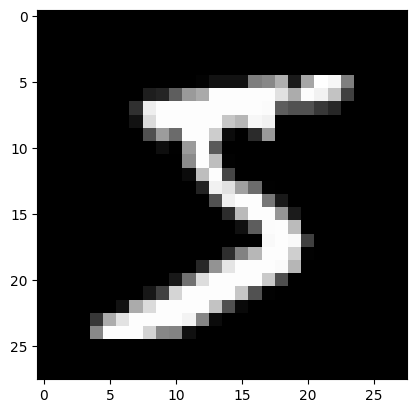

In [25]:
# Załaduj dane
(x_train,y_train), (x_test, y_test) = mnist.load_data()
# podgląd
print("etykieta ",y_train[0])
plt.imshow(x_train[0], cmap='gray')
print(len(x_test), len(y_test))

In [26]:
# Przetwórz dane
# Dane typu float32, modele często lepiej radzą sobie z danymi liczbowymi w formie zmiennoprzecinkowej.
# Normalizujemy dane do przedziału [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [27]:
# Konwertuj etykiety na kategorie
# kodowanie kategoryczne (one-hot encoding) na zbiorze etykiet treningowych
# zamienia etykiety klas na postać binarną w formie wektorów zer i jedynek
# 3 -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
# Zdefiniuj model za pomocą Functional API
# Conv2D(liczba filtrów,...)
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)
ConV1 = Conv2D(4, kernel_size=(3, 3), activation="relu") (inputs)
MaxP = MaxPooling2D(pool_size=(2, 2)) (ConV1)
Flat = Flatten() (MaxP)
FullConnected = Dense(64, activation="relu") (Flat)
outputs = Dense(num_classes, activation="softmax") (FullConnected)
model = Model(inputs, outputs)

In [29]:
# Skompiluj model
# 'categorical_crossentropy' średnia z logarytmu przewidywanych prawdopodobieństw dla prawdziwej klasy
# Optymalizator Adam (Adaptive Moment Estimation) wykorzystuje adaptacyjne momenty gradientu do efektywnego dostosowywania wag modelu podczas treningu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trenuj model
# batch_size liczba próbek treningowych użytych do jednej aktualizacji wag modelu podczas jednej iteracji treningowej
model.fit(x_train, y_train, batch_size=128, epochs=5, verbose='auto', validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7560 - loss: 0.9202 - val_accuracy: 0.9466 - val_loss: 0.1832
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9496 - loss: 0.1713 - val_accuracy: 0.9632 - val_loss: 0.1231
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9635 - loss: 0.1245 - val_accuracy: 0.9702 - val_loss: 0.1000
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9714 - loss: 0.0963 - val_accuracy: 0.9729 - val_loss: 0.0865
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9761 - loss: 0.0805 - val_accuracy: 0.9725 - val_loss: 0.0859


In [30]:
# Ocena modelu
loss, accuracy = model.evaluate(x_test, y_test, verbose='auto')
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9664 - loss: 0.1024
Test loss: 0.08587832003831863
Test accuracy: 0.9725000262260437


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 676)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        43,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,056 (515.85 KB)

 Trainable params: 44,018 (171.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,038 (343.90 KB)

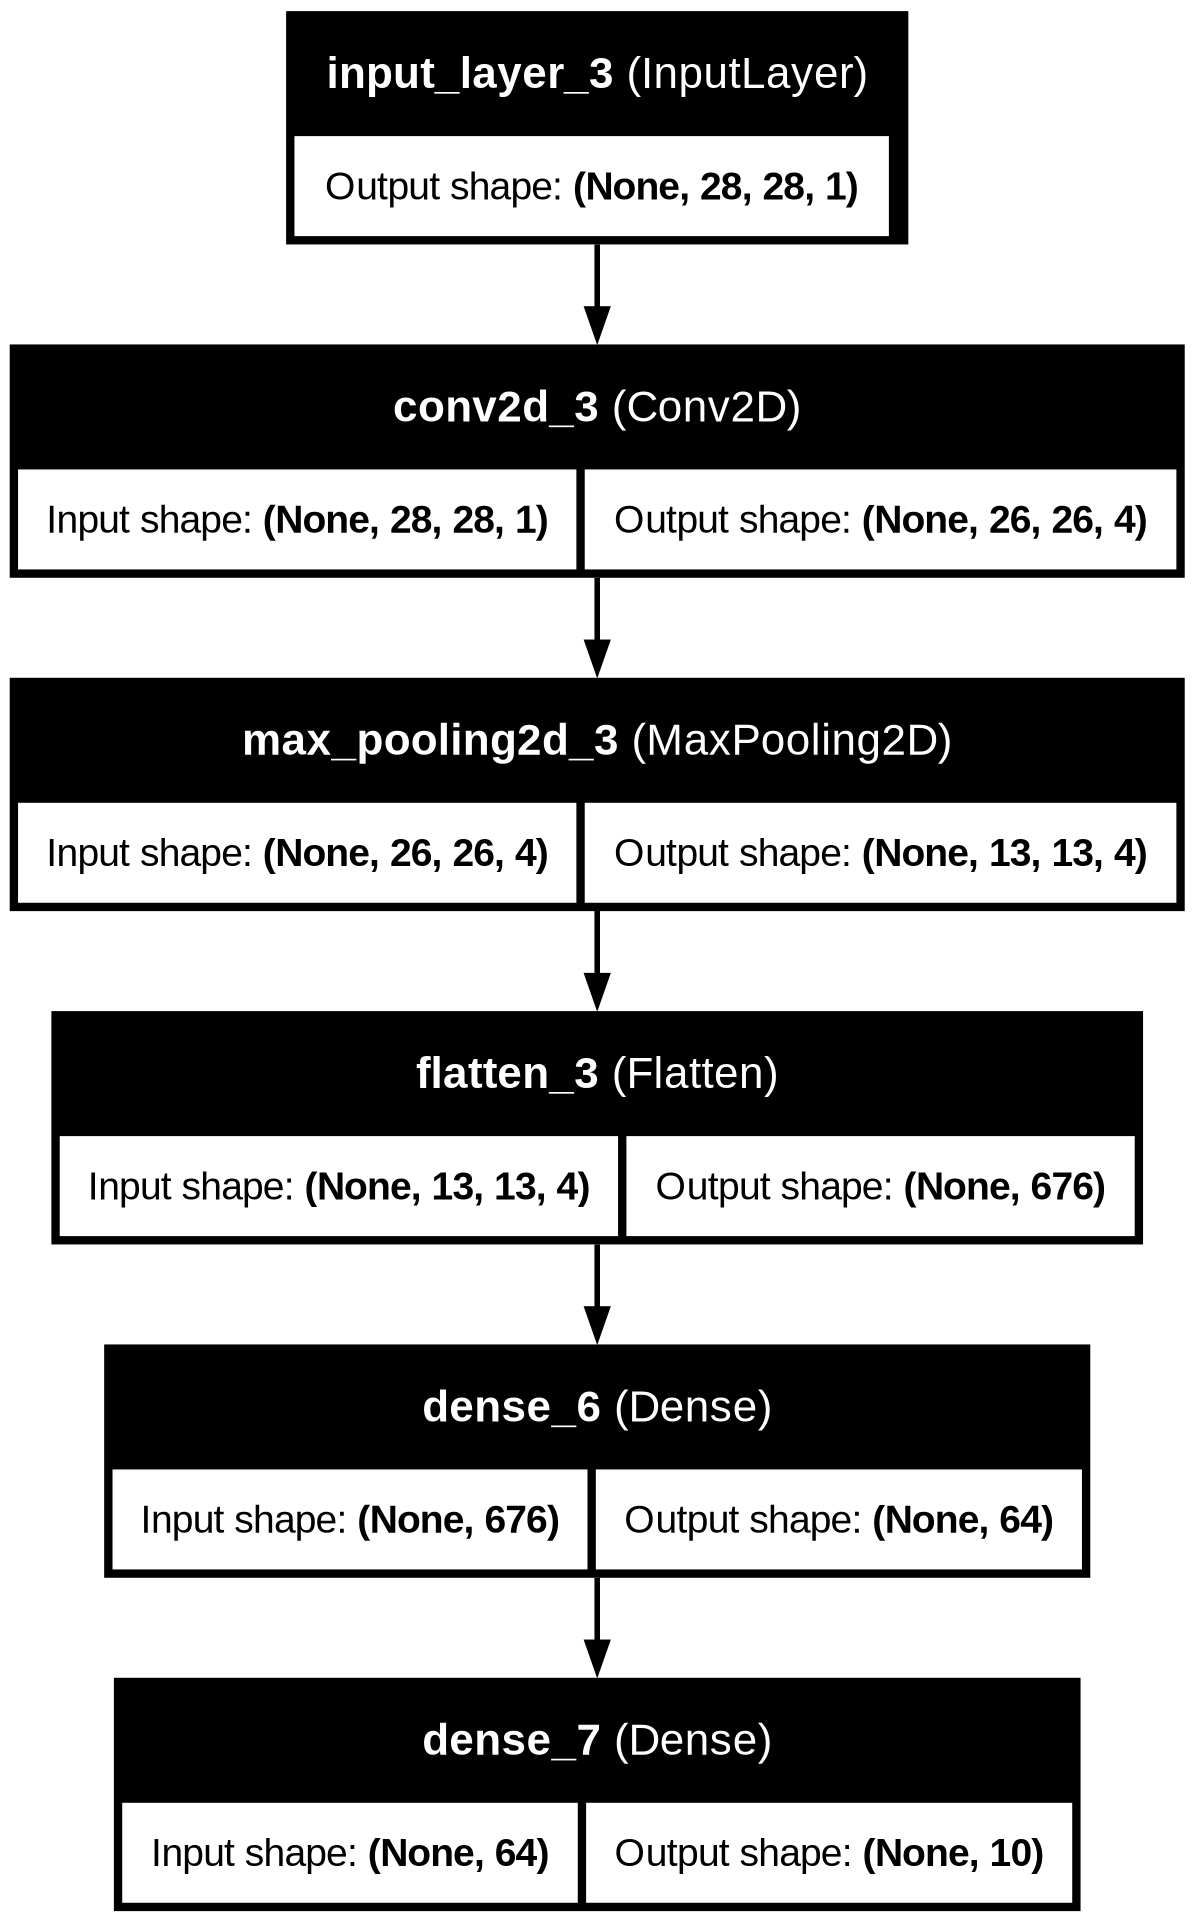

In [31]:
# Wizualizacja modelu
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)# to_file='model_plot.png',

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Przykład źle sklasyfikowany nr 1


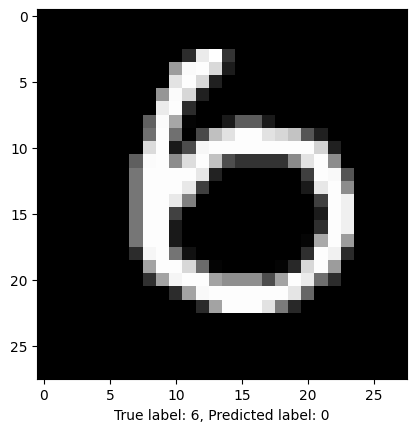

Przykład źle sklasyfikowany nr 2


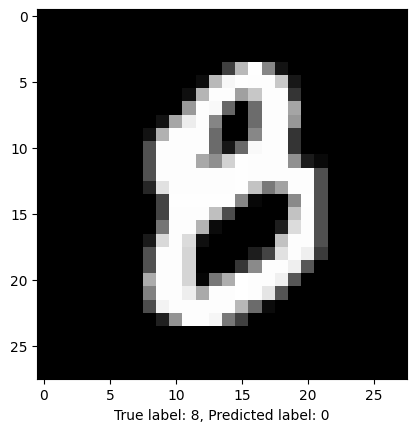

Przykład źle sklasyfikowany nr 3


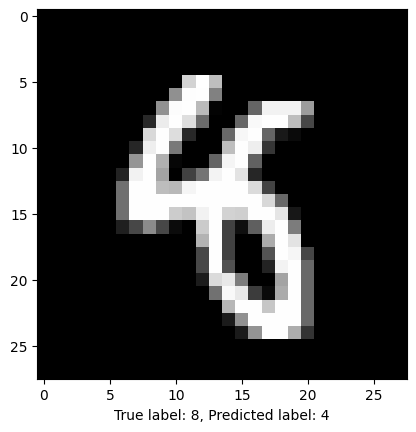

Przykład źle sklasyfikowany nr 4


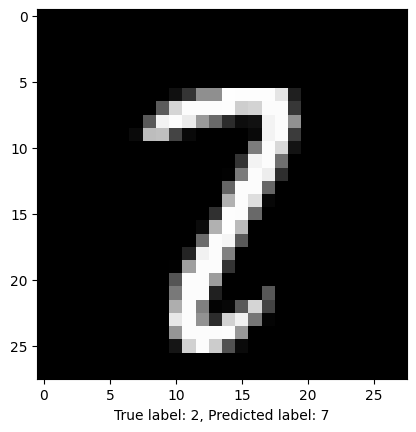

Przykład źle sklasyfikowany nr 5


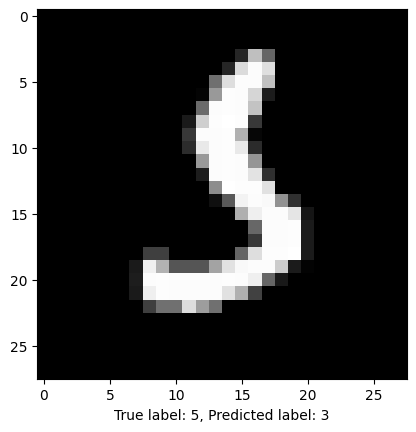

In [32]:
# Wyświetlanie przykładów źle sklasyfikowanych
predictions = model.predict(x_test)
incorrect_indices = np.nonzero(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

for i in range(5):
    idx = incorrect_indices[i]
    print("Przykład źle sklasyfikowany nr", i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.xlabel(f"True label: {np.argmax(y_test[idx])}, Predicted label: {np.argmax(predictions[idx])}")
    plt.show()